<span class="mark">Here I set values for broadeing</span> 

In [1]:
fixed_gauss_sigma_xas = 2.0        # this is for fixed Gaussian broadenig
variable_lorentzian_divisor = 5    # this is for E-dependent broadenig divisor. Valance max is energy offset.
fixed_gauss_sigma_pdos = 0.2       # this is for fixed Gaussian broadenig for PDOS plot
fixed_gauss_sigma_xas2 = 0.5       # this is for fixed Gaussian broadenig for XAS in PDOS plot

<span class="mark">Load some python-related stuff</span>

In [2]:
# %reset
%matplotlib notebook

import numpy as np
from pylab import *
from matplotlib import gridspec
from matplotlib import pyplot as plt


font = {'weight':'regular','family':'sans-serif','size':10}
matplotlib.rc('font', **font)



# a very simple function to find peaks
def findpeaks(dx,dy):
    peaks = []
    peaksx = []
    peaksy = []
    peaky = dy[0]
    for p in range(1,len(dx)-1):
        if dy[p] > peaky: 
            peaky = dy[p]; peakx = dx[p]; 
            if (dy[p-1] < peaky) and (dy[p+1] < peaky) : peaks.append([peakx,peaky,0])     
    peaks = np.array(peaks)  
    
    return peaks



# Fixed Gaussian broadening with "sigma" as input
def Gaussian(xin,yin,sigma):    
    #fwhm = sigma * 2.354820    
    delta = xin[1]-xin[0]
    
    if sigma == 0: sigma = delta
    
    xout = xin
    yout = xin*0
    
    term1 = ( delta/( np.sqrt(2*3.14159265359) * sigma) )
    term2 = (-2*sigma**2)   
    
    for i in range(len(xin)):
        for j in range(len(xin)):
            yout[i]=yout[i]+yin[j]*term1*np.exp ( ((xin[i]-xin[j])**2)/term2 )
            
    return xout, yout



# Variable Lorentzian broadening with "bin" as input
def Lorentzian(xin,yin,bin):
    
    delta = xin[1]-xin[0]
    
    xout = xin
    yout = xin*0
    for i in range(len(xin)):
        gamma = bin[i]/2.354820
        for j in range(len(xin)):
            yout[j]=yout[j]+yin[i]/3.14159265359*(np.arctan((xin[i]-xin[j]+delta)/gamma)-(np.arctan((xin[i]-xin[j]-delta)/gamma)))
            
    yout = yout/2
    
    return xout, yout

<span class="mark">Load exp data</span>

In [3]:
# data = np.loadtxt('./_exp-data/new-data.dat', unpack=True, comments='#', skiprows=0)
# E = data[0,:]; x0 = data[1,:]; x1 = data[-1,:]
# NbC_exp = np.loadtxt('../../_others/exp-NbC.dat', unpack=True, comments='#')
# NbF_exp = np.loadtxt('../../_others/exp-NbF.dat', unpack=True, comments='#')
# NbO_exp = np.loadtxt('../../_others/exp-NbO.dat', unpack=True, comments='#')

# np.save('./data/NbC_exp', NbC_exp)
# np.save('./data/NbF_exp', NbF_exp)
# np.save('./data/NbO_exp', NbO_exp)

# ! cd data; zip -q ../data.npz *

# readnpz = np.load('data.npz')
# NbC_exp = readnpz['NbC_exp']
# NbF_exp = readnpz['NbF_exp'] 
# NbO_exp = readnpz['NbO_exp'] 



# # OCEAN XES data without additional broadening ===============
# E1, I1, Iatom, Iall = mOCEAN.read_absspct(absfile='../NbC/OCEAN/ocean_xesspcts.dat')
# peaks = mXAS.findpeaks(E1,I1); print(peaks[0][0])
# E1 = E1-peaks[0][0]; I1 = I1/peaks[0][1]


# E2, I2, Iatom, Iall = mOCEAN.read_absspct(absfile='../NbF/OCEAN/ocean_xesspcts.dat')
# peaks = mXAS.findpeaks(E2,I2); print(peaks[0][0])
# E2 = E2-peaks[1][0]; I2 = I2/peaks[1][1]


# E3, I3, Iatom, Iall = mOCEAN.read_absspct(absfile='../NbO/OCEAN/ocean_xesspcts.dat')
# I3 = Iatom[0]+Iatom[1]+Iatom[2]+Iatom[2]+Iatom[3]+Iatom[3]+Iatom[4]+Iatom[5]
# peaks = mXAS.findpeaks(E3,I3); print(peaks[0][0])
# E3 = E3-peaks[3][0]; I3 = I3/peaks[3][1]

# NbC_ocean = E1, I1
# np.save('./data/NbC_ocean', NbC_ocean)
# NbF_ocean = E2, I2
# np.save('./data/NbF_ocean', NbF_ocean)
# NbO_ocean = E3, I3
# np.save('./data/NbO_ocean', NbO_ocean)

# ! cd data; zip -q ../data.npz *

# readnpz = np.load('data.npz')
# NbC_ocean = readnpz['NbC_ocean']
# NbF_ocean = readnpz['NbF_ocean'] 
# NbO_ocean = readnpz['NbO_ocean'] 




# ################################################################
# sigma=0.2

# # # NbF
# pdosin = loadpdos(file='../NbF/QE-PDOS/qerun.npz')
# sel='1:24|spdf|u'; E1, t1, p = getpdos(pdosin,sel,sigma);
# sel='1:4|p|u';  E, t, p1Nbp = getpdos(pdosin,sel,sigma); # Nb p
# sel='1:4|d|u';  E, t, p1Nbd = getpdos(pdosin,sel,sigma); # Nb p
# sel='5:24|s|u'; E, t, p1Fs  = getpdos(pdosin,sel,sigma); # F s
# sel='5:24|p|u'; E, t, p1Fp  = getpdos(pdosin,sel,sigma); # F p
# NbF_pdos = E1, p1Nbp, p1Nbd, p1Fs, p1Fp 
# np.save('./data/NbF_pdos', NbF_pdos)


# # # NbO
# pdosin = loadpdos(file='../NbO/QE-PDOS/qerun.npz')
# sel='1:56|spdf|u'; E2, t2, p = getpdos(pdosin,sel,sigma);
# sel='1:16|p|u';  E, t, p2Nbp = getpdos(pdosin,sel,sigma); # Nb p
# sel='1:16|d|u';  E, t, p2Nbd = getpdos(pdosin,sel,sigma); # Nb p
# sel='17:56|s|u'; E, t, p2Os  = getpdos(pdosin,sel,sigma); # O s
# sel='17:56|p|u'; E, t, p2Op  = getpdos(pdosin,sel,sigma); # O p
# NbO_pdos = E2, p2Nbp, p2Nbd, p2Os, p2Op 
# np.save('./data/NbO_pdos', NbO_pdos)

# # # NbC
# pdosin = loadpdos(file='../NbC/QE-PDOS/qerun.npz')
# sel='1:2|spdf|u'; E3, t3, p = getpdos(pdosin,sel,sigma);
# sel='1|p|u';  E, t, p3Nbp = getpdos(pdosin,sel,sigma); # Nb p
# sel='1|d|u';  E, t, p3Nbd = getpdos(pdosin,sel,sigma); # Nb p
# sel='2|s|u'; E, t, p3Cs  = getpdos(pdosin,sel,sigma); # C s
# sel='2|p|u'; E, t, p3Cp  = getpdos(pdosin,sel,sigma); # C p
# NbC_pdos = E3, p3Nbp, p3Nbd, p3Cs, p3Cp 
# np.save('./data/NbC_pdos', NbC_pdos)

# ! cd data; zip -q ../data.npz *

# readnpz = np.load('data.npz')
# NbC_pdos = readnpz['NbC_pdos']
# NbF_pdos = readnpz['NbF_pdos'] 
# NbO_pdos = readnpz['NbO_pdos'] 



# Make sure that data.npz should be available here
readnpz = np.load('data.npz')

NbC_exp = readnpz['NbC_exp']
NbF_exp = readnpz['NbF_exp'] 
NbO_exp = readnpz['NbO_exp'] 
NbC_ocean = readnpz['NbC_ocean']
NbF_ocean = readnpz['NbF_ocean'] 
NbO_ocean = readnpz['NbO_ocean'] 
NbC_pdos = readnpz['NbC_pdos']
NbF_pdos = readnpz['NbF_pdos'] 
NbO_pdos = readnpz['NbO_pdos'] 

<span class="mark">XAS plot</span>

<IPython.core.display.Javascript object>


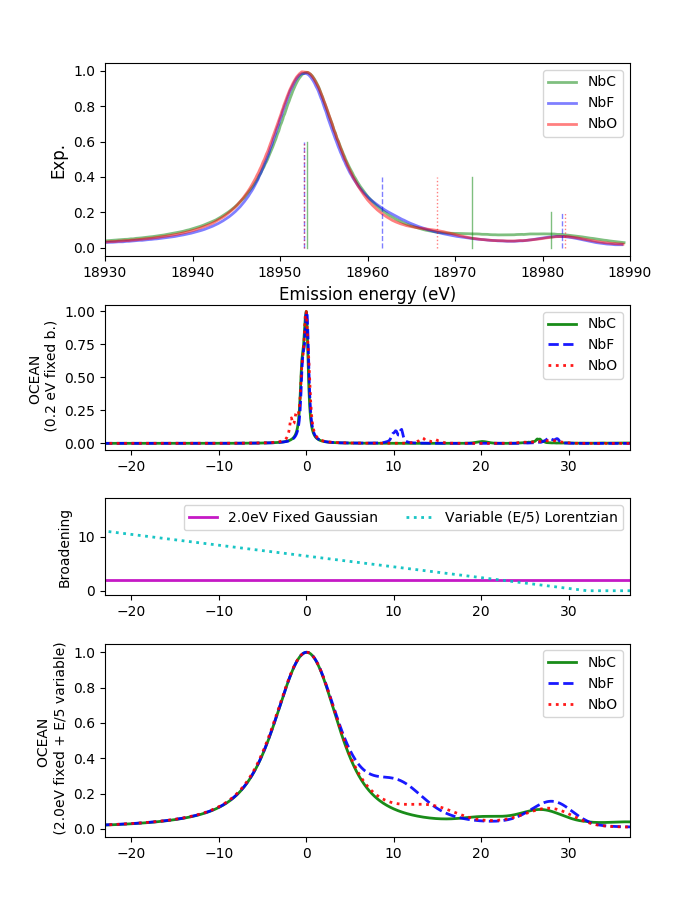

In [4]:
fig = plt.figure(figsize=(7,9))

gs = gridspec.GridSpec(7, 1, height_ratios=[2,0.5,1.5,0.5,1,0.5,2] )    
gs.update(top=0.93, bottom=0.07, left=0.15, right=0.9, wspace=0.0, hspace=0.0)


# exp ===============================================
ax = fig.add_subplot(gs[0]); #ax.grid(True)

ax.plot(NbC_exp[0],NbC_exp[1], 'g-', lw=2, alpha=0.5, label='NbC'); peaks0 = findpeaks(NbC_exp[0],NbC_exp[1])
ax.plot(NbF_exp[0],NbF_exp[1], 'b-', lw=2, alpha=0.5, label='NbF');
ax.plot(NbO_exp[0],NbO_exp[1], 'r-', lw=2, alpha=0.5, label='NbO');

# K Beta2
ax.plot([18953.03,18953.03],[0,0.6], 'g-',  lw=1, alpha=0.5);
ax.plot([18952.70,18952.70],[0,0.6], 'b--', lw=1, alpha=0.5);
ax.plot([18952.78,18952.78],[0,0.6], 'r:',  lw=1, alpha=0.5);

# K Beta4
ax.plot([18981.02,18981.02],[0,0.2], 'g-',  lw=1, alpha=0.5);
ax.plot([18982.18,18982.18],[0,0.2], 'b--', lw=1, alpha=0.5);
ax.plot([18982.52,18982.52],[0,0.2], 'r:',  lw=1, alpha=0.5);

# K Beta''
ax.plot([18971.96,18971.96],[0,0.4], 'g-',  lw=1, alpha=0.5);
ax.plot([18961.61,18961.61],[0,0.4], 'b--', lw=1, alpha=0.5);
ax.plot([18967.99,18967.99],[0,0.4], 'r:',  lw=1, alpha=0.5);

ax.set_xlabel('Emission energy (eV)', fontsize=12)
ax.set_ylabel('Exp.', fontsize=12)
ax.legend(loc='best',fontsize=10,ncol=1)
ax.set_xlim( 18930, 18930+60)







# OCEAN without any broadening =================================
ax = fig.add_subplot(gs[2])
ax.plot(NbC_ocean[0],NbC_ocean[1], 'g-', lw=2, alpha=0.9, label='NbC');
ax.plot(NbF_ocean[0],NbF_ocean[1], 'b--', lw=2, alpha=0.9, label='NbF');
ax.plot(NbO_ocean[0],NbO_ocean[1], 'r:', lw=2, alpha=0.9, label='NbO');

ax.set_ylabel('OCEAN \n (0.2 eV fixed b.)', fontsize=10)
ax.legend(loc='best',fontsize=10,ncol=1)
ax.set_xlim( -23, 37)

np.savetxt('NbC_ocean.txt', np.transpose((NbC_ocean[0],NbC_ocean[1])), delimiter='  ', fmt='%2.4e')
np.savetxt('NbF_ocean.txt', np.transpose((NbF_ocean[0],NbF_ocean[1])), delimiter='  ', fmt='%2.4e')
np.savetxt('NbO_ocean.txt', np.transpose((NbO_ocean[0],NbO_ocean[1])), delimiter='  ', fmt='%2.4e')







# broadening ===============================================
ax = fig.add_subplot(gs[4])

e_b = NbC_ocean[0].copy()

b_fixed = e_b*0 + 2
ax.plot(e_b,b_fixed, 'm-', lw=2, alpha=0.9, label=str(fixed_gauss_sigma_xas)+'eV Fixed Gaussian')


b_vari = b_fixed*0
for i in range(len(e_b)):
    if e_b[i] < 32:
        offset = 32 - e_b[i] 
        b_vari[i] = b_vari[i] + offset/variable_lorentzian_divisor   
ax.plot(e_b,b_vari, 'c:', lw=2, alpha=0.9, label='Variable (E/'+str(variable_lorentzian_divisor)+') Lorentzian');
ax.set_xlim( -23, 37)

ax.legend(loc='best',fontsize=10,ncol=2)
ax.set_ylabel('Broadening', fontsize=10)









# OCEAN with broadening =================================
NbC_ocean_broad = Gaussian(NbC_ocean[0],NbC_ocean[1],fixed_gauss_sigma_xas)
e_b = NbC_ocean_broad[0].copy()
b_vari = NbC_ocean_broad[0]*0 + 0.05
for i in range(len(e_b)):
    if e_b[i] < 32:
        offset = 32 - e_b[i] 
        b_vari[i] = b_vari[i] + offset/variable_lorentzian_divisor   
NbC_ocean_broad = Lorentzian(NbC_ocean_broad[0],NbC_ocean_broad[1],b_vari)
peaksNbC = findpeaks(NbC_ocean_broad[0],NbC_ocean_broad[1])

NbF_ocean_broad = Gaussian(NbF_ocean[0],NbF_ocean[1],fixed_gauss_sigma_xas)
e_b = NbF_ocean_broad[0].copy()
b_vari = NbF_ocean_broad[0]*0 + 0.05
for i in range(len(e_b)):
    if e_b[i] < 32:
        offset = 32 - e_b[i] 
        b_vari[i] = b_vari[i] + offset/variable_lorentzian_divisor    
NbF_ocean_broad = Lorentzian(NbF_ocean_broad[0],NbF_ocean_broad[1],b_vari)
peaksNbF = findpeaks(NbF_ocean_broad[0],NbF_ocean_broad[1])

NbO_ocean_broad = Gaussian(NbO_ocean[0],NbO_ocean[1],fixed_gauss_sigma_xas)
e_b = NbO_ocean_broad[0].copy()
b_vari = NbO_ocean_broad[0]*0 + 0.05
for i in range(len(e_b)):
    if e_b[i] < 32:
        offset = 32 - e_b[i] 
        b_vari[i] = b_vari[i] + offset/variable_lorentzian_divisor
NbO_ocean_broad = Lorentzian(NbO_ocean_broad[0],NbO_ocean_broad[1],b_vari)
peaksNbO = findpeaks(NbO_ocean_broad[0],NbO_ocean_broad[1])


ax = fig.add_subplot(gs[6])
ax.plot(NbC_ocean_broad[0]-peaksNbC[0][0],NbC_ocean_broad[1]/peaksNbC[0][1], 'g-', lw=2, alpha=0.9, label='NbC');
ax.plot(NbF_ocean_broad[0]-peaksNbF[0][0],NbF_ocean_broad[1]/peaksNbF[0][1], 'b--', lw=2, alpha=0.9, label='NbF');
ax.plot(NbO_ocean_broad[0]-peaksNbO[0][0],NbO_ocean_broad[1]/peaksNbO[0][1], 'r:', lw=2, alpha=0.9, label='NbO');

ax.set_ylabel('OCEAN \n ('+str(fixed_gauss_sigma_xas)+'eV fixed + E/'+str(variable_lorentzian_divisor)+' variable)', fontsize=10)
ax.legend(loc='best',fontsize=10,ncol=1)
ax.set_xlim( -23, 37)

np.savetxt('NbC_ocean_broad.txt', np.transpose((NbC_ocean_broad[0]-peaksNbC[0][0],NbC_ocean_broad[1]/peaksNbC[0][1])), delimiter='  ', fmt='%2.4e')
np.savetxt('NbF_ocean_broad.txt', np.transpose((NbF_ocean_broad[0]-peaksNbF[0][0],NbF_ocean_broad[1]/peaksNbF[0][1])), delimiter='  ', fmt='%2.4e')
np.savetxt('NbO_ocean_broad.txt', np.transpose((NbO_ocean_broad[0]-peaksNbO[0][0],NbF_ocean_broad[1]/peaksNbO[0][1])), delimiter='  ', fmt='%2.4e')

plt.savefig("fig1.pdf", format='pdf', dpi=300)


<span class="mark">PDOS+XAS plot</span>

<IPython.core.display.Javascript object>


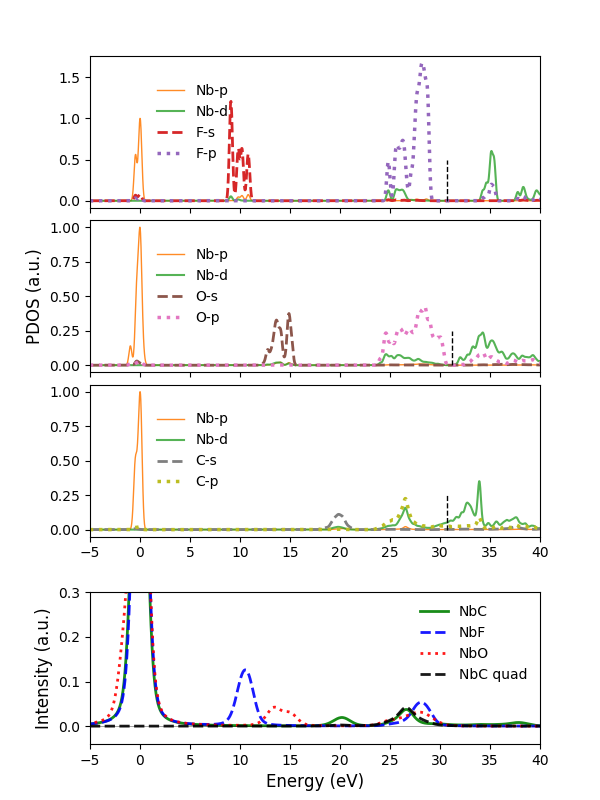

[-0.10000000000000142, -0.10000000000000142, -0.099999999999997868]


In [21]:
fig = plt.figure(figsize=(6,8))

gs = gridspec.GridSpec(5, 1, height_ratios=[1,1,1,0.2,1] )    
gs.update(top=0.93, bottom=0.07, left=0.15, right=0.9, wspace=0.1, hspace=0.1)


# NbF ===============================================
ax = fig.add_subplot(gs[0])
peaks = findpeaks(NbF_pdos[0],NbF_pdos[1]); xshift=peaks[1,0]; yscale=1/peaks[1,1]
ax.plot(NbF_pdos[0]-xshift,NbF_pdos[1]*yscale, 'C1-', lw=1, alpha=0.9, label='Nb-p')
ax.plot(NbF_pdos[0]-xshift,NbF_pdos[2]*yscale, 'C2-', lw=1.5, alpha=0.8, label='Nb-d')
ax.plot(NbF_pdos[0]-xshift,NbF_pdos[3]*yscale, 'C3--', lw=2, alpha=1, label='F-s')
ax.plot(NbF_pdos[0]-xshift,NbF_pdos[4]*yscale, 'C4:', lw=2.5, alpha=1, label='F-p')
ax.plot([-xshift,-xshift],[0,0.5], 'k--', lw=1)

ax.set_xlim( -5, 40)
# ax.set_yticks([]); 
plt.setp( ax.get_xticklabels(), visible=False);
ax.legend(loc='upper left',bbox_to_anchor=(0.12, 0.9),fontsize=10,ncol=1,frameon=False,columnspacing=0.8)

np.savetxt('NbF_pdos.txt', np.transpose(( NbF_pdos[0]-xshift,
                                        NbF_pdos[1]*yscale,
                                        NbF_pdos[2]*yscale,
                                        NbF_pdos[3]*yscale,
                                        NbF_pdos[4]*yscale)), delimiter='  ', fmt='%2.4e')





# NbO ===============================================
ax = fig.add_subplot(gs[1])
peaks = findpeaks(NbO_pdos[0],NbO_pdos[1]); xshift=peaks[1,0]; yscale=1/peaks[1,1]
ax.plot(NbO_pdos[0]-xshift,NbO_pdos[1]*yscale, 'C1-', lw=1, alpha=0.9, label='Nb-p')
ax.plot(NbO_pdos[0]-xshift,NbO_pdos[2]*yscale, 'C2-', lw=1.5, alpha=0.8, label='Nb-d')
ax.plot(NbO_pdos[0]-xshift,NbO_pdos[3]*yscale, 'C5--', lw=2, alpha=1, label='O-s')
ax.plot(NbO_pdos[0]-xshift,NbO_pdos[4]*yscale, 'C6:', lw=2.5, alpha=1, label='O-p')
ax.plot([-xshift,-xshift],[0,0.25], 'k--', lw=1)

ax.set_xlim( -5, 40)
# ax.set_yticks([]); 
plt.setp( ax.get_xticklabels(), visible=False);
ax.set_ylabel('PDOS (a.u.)', fontsize=12)
ax.legend(loc='upper left',bbox_to_anchor=(0.12, 0.9),fontsize=10,ncol=1,frameon=False,columnspacing=0.8)

np.savetxt('NbO_pdos.txt', np.transpose(( NbO_pdos[0]-xshift,
                                        NbO_pdos[1]*yscale,
                                        NbO_pdos[2]*yscale,
                                        NbO_pdos[3]*yscale,
                                        NbO_pdos[4]*yscale)), delimiter='  ', fmt='%2.4e')





# NbC ===============================================
ax = fig.add_subplot(gs[2])
peaks = findpeaks(NbC_pdos[0],NbC_pdos[1]); 
xshift=peaks[0,0]; yscale=1/peaks[0,1]
ax.plot(NbC_pdos[0]-xshift,NbC_pdos[1]*yscale, 'C1-', lw=1, alpha=0.9, label='Nb-p')
ax.plot(NbC_pdos[0]-xshift,NbC_pdos[2]*yscale, 'C2-', lw=1.5, alpha=0.8, label='Nb-d')
ax.plot(NbC_pdos[0]-xshift,NbC_pdos[3]*yscale, 'C7--', lw=2, alpha=1, label='C-s')
ax.plot(NbC_pdos[0]-xshift,NbC_pdos[4]*yscale, 'C8:', lw=2.5, alpha=1, label='C-p')
ax.plot([-xshift,-xshift],[0,0.25], 'k--', lw=1)

np.savetxt('NbC_pdos.txt', np.transpose(( NbC_pdos[0]-xshift,
                                        NbC_pdos[1]*yscale,
                                        NbC_pdos[2]*yscale,
                                        NbC_pdos[3]*yscale,
                                        NbC_pdos[4]*yscale)), delimiter='  ', fmt='%2.4e')

ax.set_xlim( -5, 40)
# ax.set_yticks([]); 
# plt.setp( ax.get_xticklabels(), visible=False);
ax.legend(loc='upper left',bbox_to_anchor=(0.12, 0.9),fontsize=10,ncol=1,frameon=False,columnspacing=0.8)




# OCEAN ===============================================
ax = fig.add_subplot(gs[4])

NbC_ocean_broad2 = Gaussian(NbC_ocean[0],NbC_ocean[1],fixed_gauss_sigma_xas2)
peaksNbC = findpeaks(NbC_ocean_broad2[0],NbC_ocean_broad2[1])
NbF_ocean_broad2 = Gaussian(NbF_ocean[0],NbF_ocean[1],fixed_gauss_sigma_xas2)
peaksNbF = findpeaks(NbF_ocean_broad2[0],NbF_ocean_broad2[1])
NbO_ocean_broad2 = Gaussian(NbO_ocean[0],NbO_ocean[1],fixed_gauss_sigma_xas2)
peaksNbO = findpeaks(NbO_ocean_broad2[0],NbO_ocean_broad2[1])

ax.plot(NbC_ocean_broad2[0]-peaksNbC[0][0],NbC_ocean_broad2[1]/peaksNbC[0][1], 'g-', lw=2, alpha=0.9, label='NbC');
ax.plot(NbF_ocean_broad2[0]-peaksNbF[0][0],NbF_ocean_broad2[1]/peaksNbF[0][1], 'b--', lw=2, alpha=0.9, label='NbF');
ax.plot(NbO_ocean_broad2[0]-peaksNbO[1][0],NbO_ocean_broad2[1]/peaksNbO[1][1], 'r:', lw=2, alpha=0.9, label='NbO');

ax.set_ylabel('OCEAN \n (2.0eV fixed + E/5 variable)', fontsize=10)
ax.legend(loc='best',fontsize=10,ncol=1)
ax.set_xlim( -23, 37)

import mOCEAN
import mSMOOTH
E, I, Iatom, Iall = mOCEAN.read_absspct(absfile='/home/mt/gd/research/ACTIVE/XES/v2/NbC/OCEAN.old/quad-olny/ocean_xesspcts.dat')
E, I = mSMOOTH.Gaussian(E,I,sigma=0.2)
ax.plot(E--30.8500000000-0.08,0.0+500*(I/0.000117987406802), 'k--', lw=2, alpha=0.9, label='NbC quad');
np.savetxt('quad.txt', np.transpose((E--30.85-0.08,0.0+500*(I/0.000117987406802))), delimiter='  ', fmt='%2.4e')

np.savetxt('NbC_ocean_broad2.txt', np.transpose((NbC_ocean_broad2[0]-peaksNbC[0][0],NbC_ocean_broad2[1]/peaksNbC[0][1])), delimiter='  ', fmt='%2.4e')
np.savetxt('NbF_ocean_broad2.txt', np.transpose((NbF_ocean_broad2[0]-peaksNbF[0][0],NbF_ocean_broad2[1]/peaksNbF[0][1])), delimiter='  ', fmt='%2.4e')
np.savetxt('NbO_ocean_broad2.txt', np.transpose((NbO_ocean_broad2[0]-peaksNbO[1][0],NbO_ocean_broad2[1]/peaksNbO[1][1])), delimiter='  ', fmt='%2.4e')
print([peaksNbC[0][0],peaksNbF[0][0],peaksNbO[1][0]])

ax.plot([-10,70],[0.00,0.00], 'k', lw=0.5, alpha=0.5);

ax.set_ylabel('Intensity (a.u.)', fontsize=12)
ax.set_xlabel('Energy (eV)', fontsize=12)
ax.legend(loc='best',fontsize=10,ncol=1,frameon=False,)
ax.set_xlim( -60, 0); 
# ax.set_yticks([]); 
ax.set_xlim( -5, 40)
ax.set_ylim( -0.04, 0.3)


plt.savefig("fig2.pdf", format='pdf', dpi=300)

ls: cannot access '../NbC/OCEAN.old/quad-olny/': No such file or directory
